In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.rcParams['font.family'] = 'Proxima Nova'


### Bag-of-words binaire

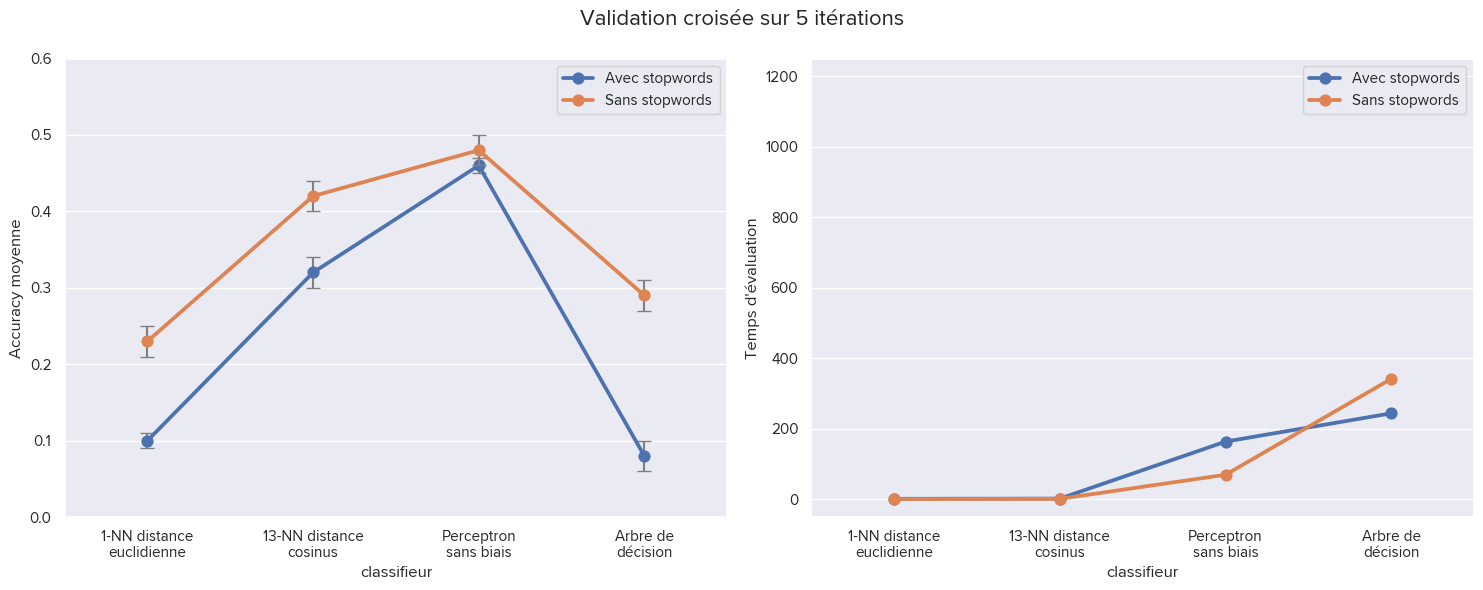

In [58]:
classifiers = ["1-NN distance\neuclidienne", "13-NN distance\ncosinus", "Perceptron\nsans biais", "Arbre de\ndécision"]
data_sw=pd.DataFrame(data={"mean":[0.10, 0.32, 0.46, 0.08],
                           "std":[0.01, 0.02, 0.01, 0.02],
                           "time":[1.76, 2.28, 163.91, 244.05],
                           "classifieur":classifiers})
data_no_sw=pd.DataFrame(data={"mean":[0.23, 0.42, 0.48, 0.29],
                              "std":[0.02, 0.02, 0.02, 0.02],
                              "time":[1.13, 1.72, 69.88, 341.74],
                              "classifieur":classifiers})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.errorbar(x=range(len(data_sw)), y=data_sw["mean"], yerr=data_sw['std'], fmt='none', capsize=5, color="gray")
sns.pointplot(data=data_sw, x="classifieur", y="mean", label="Avec stopwords", ax=ax1)

ax1.errorbar(x=range(len(data_no_sw)), y=data_no_sw["mean"], yerr=data_no_sw['std'], fmt='none', capsize=5, color="gray")
sns.pointplot(data=data_no_sw, x="classifieur", y="mean", label="Sans stopwords", ax=ax1)

ax1.set_ylim(0., 0.6)
ax1.set_ylabel("Accuracy moyenne")

sns.pointplot(data=data_sw, x="classifieur", y="time", label="Avec stopwords", ax=ax2)
sns.pointplot(data=data_no_sw, x="classifieur", y="time", label="Sans stopwords", ax=ax2)

ax2.set_ylabel("Temps d'évaluation")
ax2.set_ylim(-50, 1250)

fig.suptitle("Validation croisée sur 5 itérations", fontsize=16)
plt.tight_layout()
plt.legend()

fig.savefig("images/bow_bin_eval", dpi=150,  bbox_inches='tight')

### Bag-of-words non binaire

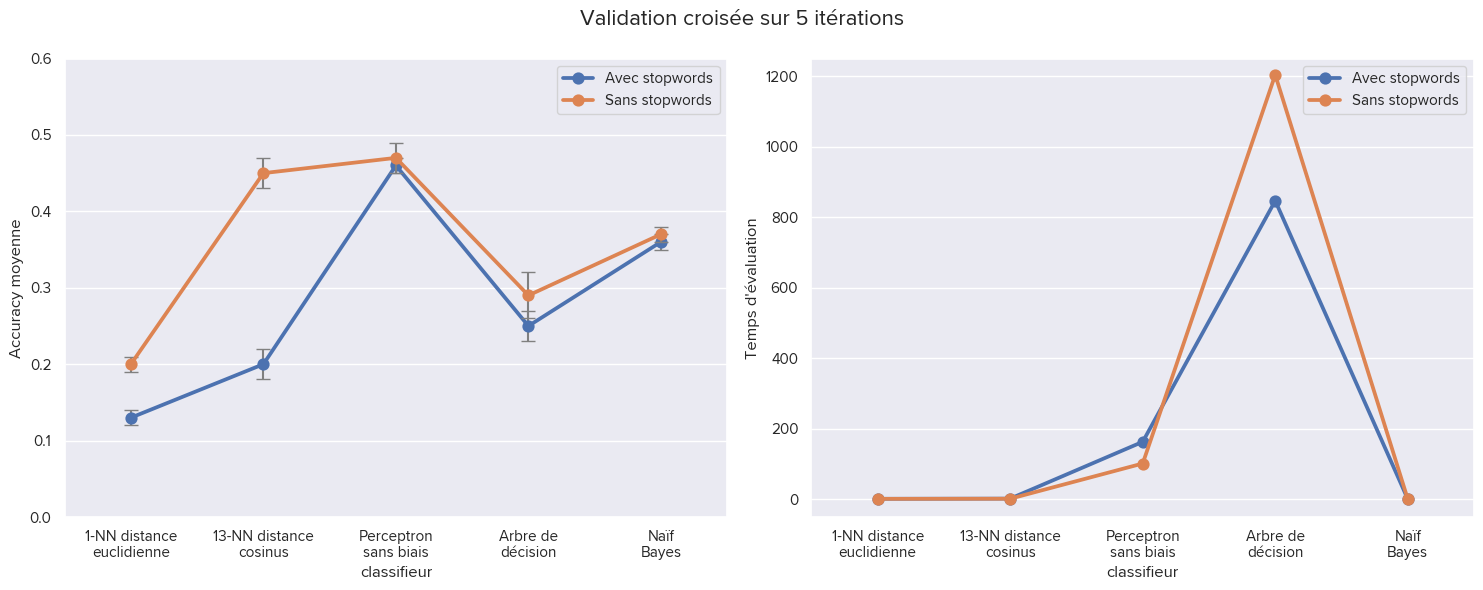

In [56]:
classifiers = ["1-NN distance\neuclidienne", "13-NN distance\ncosinus", "Perceptron\nsans biais", "Arbre de\ndécision", "Naïf\nBayes"]
data_sw=pd.DataFrame(data={"mean":[0.13, 0.20, 0.46, 0.25, 0.36],
                           "std":[0.01, 0.02, 0.01, 0.02, 0.01],
                           "time":[1.72, 2.25, 163.30, 846.61, 1.26],
                           "classifieur":classifiers})
data_no_sw=pd.DataFrame(data={"mean":[0.20, 0.45, 0.47, 0.29, 0.37],
                              "std":[0.01, 0.02, 0.02, 0.03, 0.01],
                              "time":[1.61, 1.97, 101.80, 1203.66, 1.16],
                              "classifieur":classifiers})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.errorbar(x=range(len(data_sw)), y=data_sw["mean"], yerr=data_sw['std'], fmt='none', capsize=5, color="gray")
sns.pointplot(data=data_sw, x="classifieur", y="mean", label="Avec stopwords", ax=ax1)

ax1.errorbar(x=range(len(data_no_sw)), y=data_no_sw["mean"], yerr=data_no_sw['std'], fmt='none', capsize=5, color="gray")
sns.pointplot(data=data_no_sw, x="classifieur", y="mean", label="Sans stopwords", ax=ax1)

ax1.set_ylim(0., 0.6)
ax1.set_ylabel("Accuracy moyenne")

sns.pointplot(data=data_sw, x="classifieur", y="time", label="Avec stopwords", ax=ax2)
sns.pointplot(data=data_no_sw, x="classifieur", y="time", label="Sans stopwords", ax=ax2)

ax2.set_ylabel("Temps d'évaluation")
ax2.set_ylim(-50, 1250)

fig.suptitle("Validation croisée sur 5 itérations", fontsize=16)
plt.tight_layout()
plt.legend()

fig.savefig("images/bow_non_bin_eval", dpi=150,  bbox_inches='tight')

### Tf-Idf

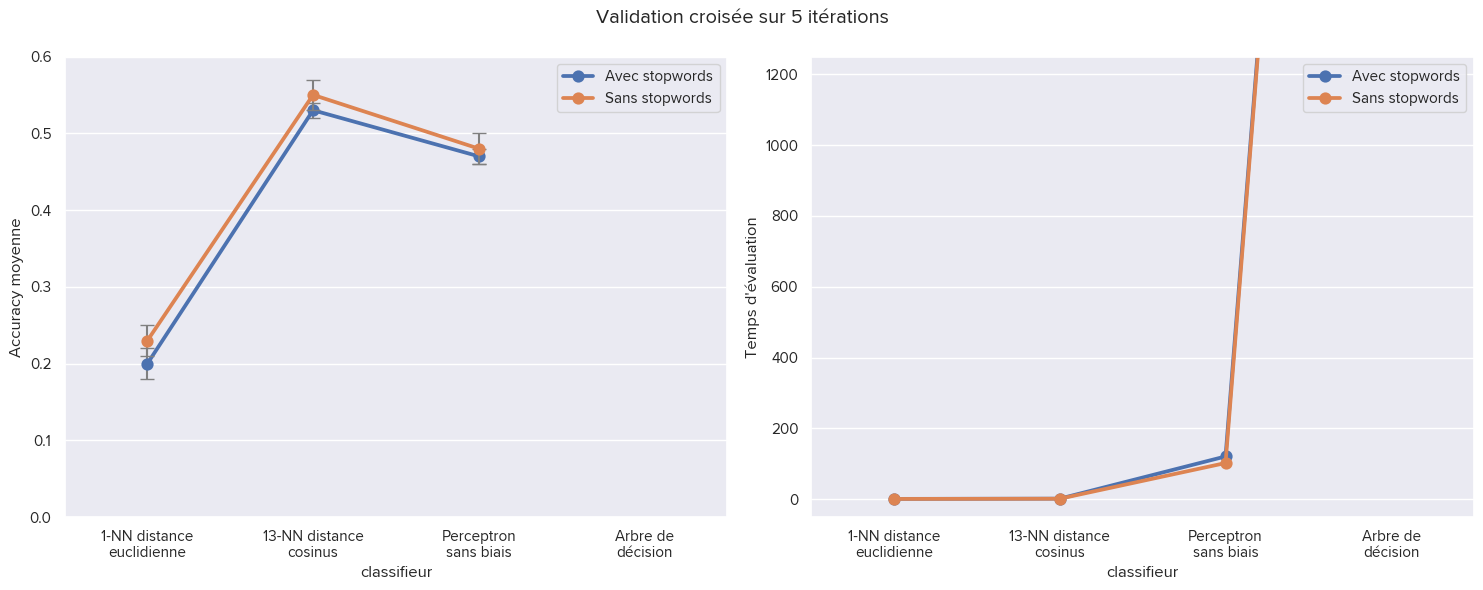

In [ ]:
classifiers = ["1-NN distance\neuclidienne", "13-NN distance\ncosinus", "Perceptron\nsans biais", "Arbre de\ndécision"]
data_sw=pd.DataFrame(data={"mean":[0.20, 0.53, 0.47, np.nan],
                           "std":[0.02, 0.01, 0.01, np.nan],
                           "time":[1.27, 1.97, 121.11, 6000],
                           "classifieur":classifiers})
data_no_sw=pd.DataFrame(data={"mean":[0.23, 0.55, 0.48, np.nan],
                              "std":[0.02, 0.02, 0.02, np.nan],
                              "time":[1.15, 1.75, 102.54, 6000],
                              "classifieur":classifiers})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.errorbar(x=range(len(data_sw)), y=data_sw["mean"], yerr=data_sw['std'], fmt='none', capsize=5, color="gray")
sns.pointplot(data=data_sw, x="classifieur", y="mean", label="Avec stopwords", ax=ax1)

ax1.errorbar(x=range(len(data_no_sw)), y=data_no_sw["mean"], yerr=data_no_sw['std'], fmt='none', capsize=5, color="gray")
sns.pointplot(data=data_no_sw, x="classifieur", y="mean", label="Sans stopwords", ax=ax1)

ax1.set_ylim(0., 0.6)
ax1.set_ylabel("Accuracy moyenne")

sns.pointplot(data=data_sw, x="classifieur", y="time", label="Avec stopwords", ax=ax2)
sns.pointplot(data=data_no_sw, x="classifieur", y="time", label="Sans stopwords", ax=ax2)

ax2.set_ylabel("Temps d'évaluation")
ax2.set_ylim(-50, 1250)

fig.suptitle("Validation croisée sur 5 itérations")
plt.tight_layout()
plt.legend()

fig.savefig("images/tfidf_eval", dpi=150,  bbox_inches='tight')